In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Graficos Labos Ethernet S1

In [3]:
dfEthernet = pd.read_csv("tablas/capturaEthernet_s1_table.csv", sep=";")

#dfEntropyEther[0] -> entropy  ;   dfEntropyEther[1] -> max entropy
dfEntropyEther = dfEthernet["probability"][len(dfEthernet["probability"])-2:].reset_index(drop=True)
dfTableEthernet = dfEthernet[:len(dfEthernet["probability"])-2]
# print dfEntropyEther
# print dfTableEthernet

dfEthernet

,symbol,probability,information
0,"<unicast, Raw>",0.003680,8.086079
1,"<unicast, LLC>",0.017090,5.870704
2,"<broadcast, ARP>",0.129880,2.944749
3,"<unicast, IP>",0.599200,0.738890
4,"<unicast, IPv6>",0.079700,3.649276
5,"<broadcast, IP>",0.167220,2.580181
6,"<unicast, ARP>",0.000300,11.702750
7,"<broadcast, LLC>",0.002930,8.414884
8,entropy,1.705766,NaN
9,max_entropy,3.000000,NaN


### Labos Ethernet S1: info y entropia

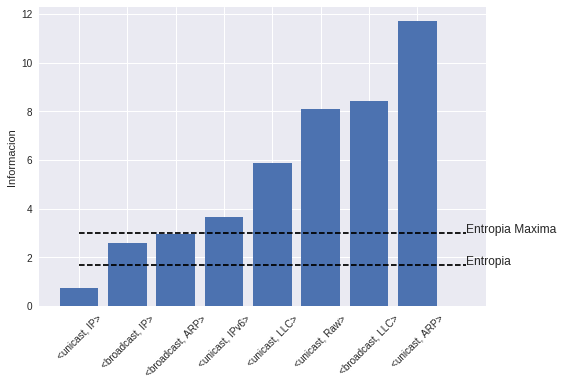

In [3]:
dfTableEthernetSortedInfo = dfTableEthernet.sort_values(by='information')

infoEther = dfTableEthernetSortedInfo["information"]
symbolsEther = dfTableEthernetSortedInfo["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoEther)), infoEther, align='center')
plt.xticks(range(len(symbolsEther)), symbolsEther,rotation=45)

plt.plot([0, len(symbolsEther)],[dfEntropyEther[0], dfEntropyEther[0]], 'k--', label='Entropia')
plt.text(len(symbolsEther), dfEntropyEther[0], 'Entropia')

plt.plot([0,len(symbolsEther)],[dfEntropyEther[1], dfEntropyEther[1]], 'k--', label='Entropia Maxima')
plt.text(len(symbolsEther), dfEntropyEther[1], 'Entropia Maxima')

plt.show()

### Labos Ethernet S1: % aparicion de cada protocolo

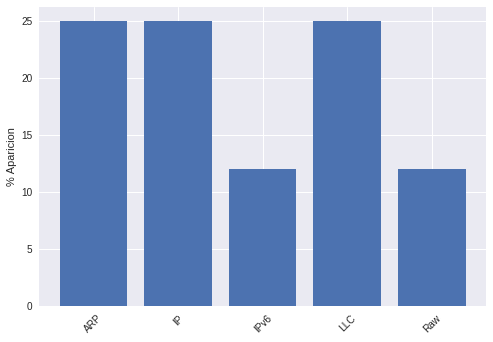

In [17]:
symbolsEther = dfTableEthernet["symbol"]

protocolosEther = []

for p in symbolsEther:
    _ , proto = p.split()
    protocolosEther.append(proto[:len(proto)-1])
protocolosEther.sort()

protoQtty = []
i = 0
while i < len(protocolosEther):
    p = protocolosEther[i]
    qtty = 1
    j = i+1
    while(j < len(protocolosEther) and protocolosEther[j] == p):
        qtty+=1
        j+=1
    protoQtty.append((p,qtty))
    i+=qtty

protocolosEther = [x[0] for x in protoQtty]
percentageProtoEther = [(x[1]*100)/len(symbolsEther) for x in protoQtty]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('% Aparicion')

plt.bar(range(len(percentageProtoEther)), percentageProtoEther, align='center')
plt.xticks(range(len(protocolosEther)), protocolosEther,rotation=45)

plt.show()

### Labos Ethernet S1: % broadcast sobre el total

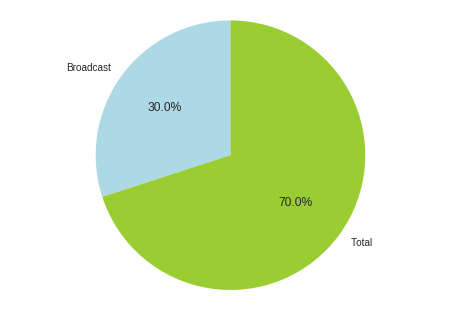

In [14]:
sumBrEther = sum(dfTableEthernet[dfTableEthernet['symbol'].str.contains('broadcast')]['probability'])*100
#probabilidad broadcast, probabilidad total - broadcast
sizesEther = [sumBrEther, 100 - sumBrEther]

labels = 'Broadcast', 'Total'
explode = [0,0]

fig1, ax1 = plt.subplots()
ax1.pie(sizesEther, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['lightblue', 'yellowgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Graficos Bufet Inalambrica S1

In [9]:
dfBufet = pd.read_csv("tablas/capturaBuffet_s1_table.csv", sep=";")

#dfEntropyBufet[0] -> entropy  ;   dfEntropyBufet[1] -> max entropy
dfEntropyBufet = dfBufet["probability"][len(dfBufet["probability"])-2:].reset_index(drop=True)
dfTableBufet = dfBufet[:len(dfBufet["probability"])-2]
#print dfEntropyBufet
#print dfTableBufet

dfBufet

,symbol,probability,information
0,"<unicast, IP>",0.949748,0.074383
1,"<broadcast, IP>",0.016600,5.912680
2,"<unicast, ARP>",0.011110,6.492039
3,"<broadcast, ARP>",0.007363,7.085414
4,"<unicast, IPv6>",0.015179,6.041787
5,entropy,0.384800,NaN
6,max_entropy,2.321928,NaN


### Bufet Inalambrica S1: info y entropia

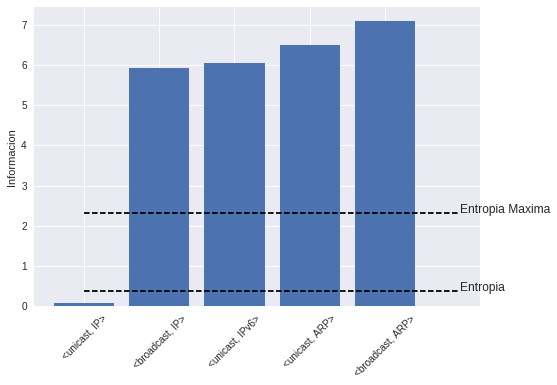

In [20]:
dfTableBufetSortedInfo = dfTableBufet.sort_values(by='information')

infoBufet = dfTableBufetSortedInfo["information"]
symbolsBufet = dfTableBufetSortedInfo["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoBufet)), infoBufet, align='center')
plt.xticks(range(len(symbolsBufet)), symbolsBufet,rotation=45)

plt.plot([0,len(symbolsBufet)],[dfEntropyBufet[0], dfEntropyBufet[0]], 'k--', label='Entropia')
plt.text(len(symbolsBufet), dfEntropyBufet[0], 'Entropia')

plt.plot([0,len(symbolsBufet)],[dfEntropyBufet[1], dfEntropyBufet[1]], 'k--', label='Entropia Maxima')
plt.text(len(symbolsBufet), dfEntropyBufet[1], 'Entropia Maxima')

plt.show()

### Bufet Inalambrica S1: % aparicion de cada protocolo

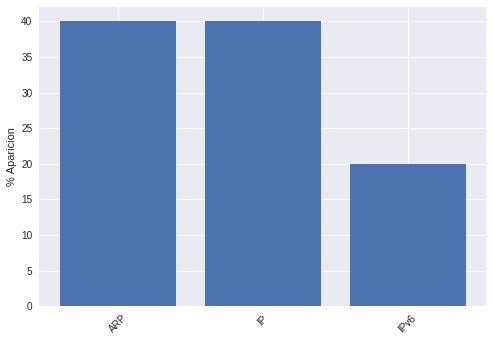

In [30]:
symbolsBufet = dfTableBufet["symbol"]

protocolosBufet = []

for p in symbolsBufet:
    _ , proto = p.split()
    protocolosBufet.append(proto[:len(proto)-1])
protocolosBufet.sort()

protoQttyBufet = []
i = 0
while i < len(protocolosBufet):
    p = protocolosBufet[i]
    qtty = 1
    j = i+1
    while(j < len(protocolosBufet) and protocolosBufet[j] == p):
        qtty+=1
        j+=1
    protoQttyBufet.append((p,qtty))
    i+=qtty

protocolosBufet = [x[0] for x in protoQttyBufet]
percentageProtoBufet = [(x[1]*100)/len(symbolsBufet) for x in protoQttyBufet]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('% Aparicion')

plt.bar(range(len(percentageProtoBufet)), percentageProtoBufet, align='center')
plt.xticks(range(len(protocolosBufet)), protocolosBufet,rotation=45)

plt.show()

### Bufet Inalambrica S1: % broadcast sobre el total

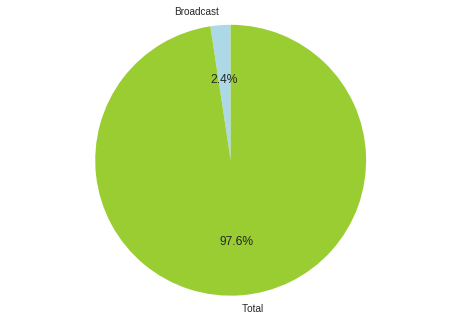

In [13]:
sumBrBufet = sum(dfTableBufet[dfTableBufet['symbol'].str.contains('broadcast')]['probability'])*100
#probabilidad broadcast, probabilidad total - broadcast
sizesBufet = [sumBrBufet, 100 - sumBrBufet]

labels = 'Broadcast', 'Total'
explode = [0,0]

fig1, ax1 = plt.subplots()
ax1.pie(sizesBufet, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['lightblue', 'yellowgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Graficos Labos Inalambrica S1

In [11]:
dfLabos = pd.read_csv("tablas/capturaLaboDC_s1_table.csv", sep=";")

#dfEntropyLabos[0] -> entropy  ;   dfEntropyLabos[1] -> max entropy
dfEntropyLabos = dfLabos["probability"][len(dfLabos["probability"])-2:].reset_index(drop=True)
dfTableLabos = dfLabos[:len(dfLabos["probability"])-2]
#print dfEntropyLabos
#print dfTableLabos

dfLabos

,symbol,probability,information
0,"<broadcast, IP>",0.252349,1.986507
1,"<unicast, ARP>",0.000952,10.036071
2,"<broadcast, ARP>",0.161667,2.628898
3,"<unicast, IP>",0.382337,1.387083
4,"<unicast, LLC>",0.001365,9.517198
5,"<broadcast, LLC>",0.005480,7.511573
6,"<unicast, IPv6>",0.195849,2.352186
7,entropy,1.981019,NaN
8,max_entropy,2.807355,NaN


### Labos Inalambrica S1: info y entropia

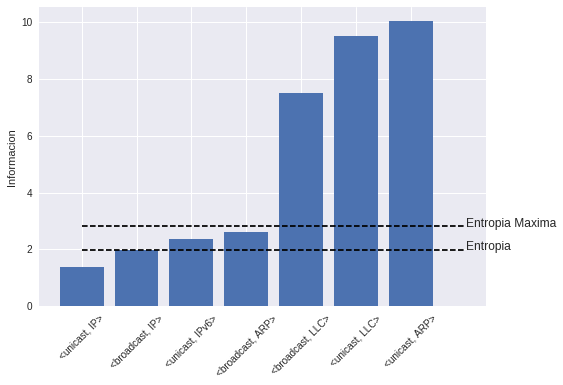

In [23]:
dfTableLabosSortedInfo = dfTableLabos.sort_values(by='information')

infoLabos = dfTableLabosSortedInfo["information"]
symbolsLabos = dfTableLabosSortedInfo["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoLabos)), infoLabos, align='center')
plt.xticks(range(len(symbolsLabos)), symbolsLabos,rotation=45)

plt.plot([0,len(symbolsLabos)],[dfEntropyLabos[0], dfEntropyLabos[0]], 'k--', label='Entropia')
plt.text(len(symbolsLabos), dfEntropyLabos[0], 'Entropia')

plt.plot([0,len(symbolsLabos)],[dfEntropyLabos[1], dfEntropyLabos[1]], 'k--', label='Entropia Maxima')
plt.text(len(symbolsLabos), dfEntropyLabos[1], 'Entropia Maxima')

plt.show()

### Labos Inalambrica S1: % aparicion de cada protocolo

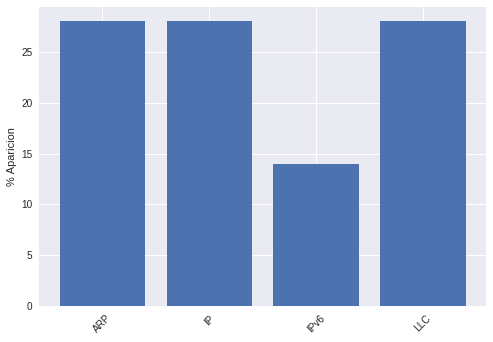

In [33]:
symbolsLabos = dfTableLabos["symbol"]

protocolosLabos = []

for p in symbolsLabos:
    _ , proto = p.split()
    protocolosLabos.append(proto[:len(proto)-1])
protocolosLabos.sort()

protoQttyLabos = []
i = 0
while i < len(protocolosLabos):
    p = protocolosLabos[i]
    qtty = 1
    j = i+1
    while(j < len(protocolosLabos) and protocolosLabos[j] == p):
        qtty+=1
        j+=1
    protoQttyLabos.append((p,qtty))
    i+=qtty

protocolosLabos = [x[0] for x in protoQttyLabos]
percentageProtoLabos = [(x[1]*100)/len(symbolsLabos) for x in protoQttyLabos]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('% Aparicion')

plt.bar(range(len(percentageProtoLabos)), percentageProtoLabos, align='center')
plt.xticks(range(len(protocolosLabos)), protocolosLabos,rotation=45)

plt.show()

### Labos Inalambrica S1: % broadcast sobre el total

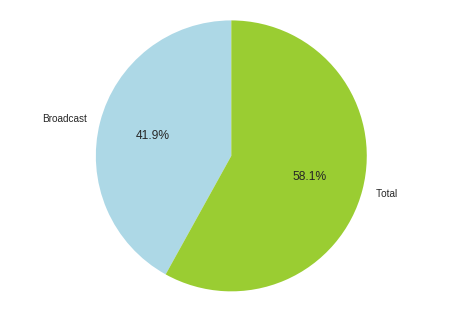

In [15]:
sumBrLabos = sum(dfTableLabos[dfTableLabos['symbol'].str.contains('broadcast')]['probability'])*100
#probabilidad broadcast, probabilidad total - broadcast
sizesLabos = [sumBrLabos, 100 - sumBrLabos]

labels = 'Broadcast', 'Total'
explode = [0,0]

fig1, ax1 = plt.subplots()
ax1.pie(sizesLabos, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['lightblue', 'yellowgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()